# Creating new variables/columns

Sometimes it is helpful to create **new variables** that transform or recode data in meaningful ways. For example, you may want to:

1) **Categorize a continuous variable** - e.g., group people as young / old based off of a continuous age variable
2) **Combine multiple related categories into a single broader group** - e.g., merging several diagnosis codes into one "cardiac" category

These kinds of transformations can make your analyses and plots clearer and more interpretable, particularly when communicating results to non-technical audiences. Here we will concentrate on the first example.

### Set up Python Libraries

As usual you will need to run this code block to import the relevant Python libraries

In [21]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import a dataset to work with

Let's use the OxfordWeather data:

In [2]:
weather = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/OxfordWeather.csv")
display(weather)

YYYY  MM  DD  Tmax  Tmin  Tmean  Trange  Rainfall_mm
0      1827   1   1   8.3   5.6    7.0     2.7          0.0
1      1827   1   2   2.2   0.0    1.1     2.2          0.0
2      1827   1   3  -2.2  -8.3   -5.3     6.1          9.7
3      1827   1   4  -1.7  -7.8   -4.8     6.1          0.0
4      1827   1   5   0.0 -10.6   -5.3    10.6          0.0
...     ...  ..  ..   ...   ...    ...     ...          ...
71338  2022   4  26  15.2   4.1    9.7    11.1          0.0
71339  2022   4  27  10.7   2.6    6.7     8.1          0.0
71340  2022   4  28  12.7   3.9    8.3     8.8          0.0
71341  2022   4  29  11.7   6.7    9.2     5.0          0.0
71342  2022   4  30  17.6   1.0    9.3    16.6          0.0

[71343 rows x 8 columns]

## Categorize a continuous variable

Sometimes we want to analyse or plot a continuous variable in broader categories. For example we might like to plot the weather across the 19th, 20th and 21st centuries separately.

To do this, we first need to create a *new column* and fill is with a place holder because we don't yet have any real values to put in it yet. The column name is up to you, here we choose CCCC to conform with the naming convention in the rest of the dataset. 

*Note: Here we are using `None` instead of `np.nan` because we anticipate that we will fill this column with non-numerical data. `Nan` is very specifically for numeric variables*

In [9]:
weather['CCCC'] = None
weather

YYYY  MM  DD  Tmax  Tmin  Tmean  Trange  Rainfall_mm  CCCC
0      1827   1   1   8.3   5.6    7.0     2.7          0.0  None
1      1827   1   2   2.2   0.0    1.1     2.2          0.0  None
2      1827   1   3  -2.2  -8.3   -5.3     6.1          9.7  None
3      1827   1   4  -1.7  -7.8   -4.8     6.1          0.0  None
4      1827   1   5   0.0 -10.6   -5.3    10.6          0.0  None
...     ...  ..  ..   ...   ...    ...     ...          ...   ...
71338  2022   4  26  15.2   4.1    9.7    11.1          0.0  None
71339  2022   4  27  10.7   2.6    6.7     8.1          0.0  None
71340  2022   4  28  12.7   3.9    8.3     8.8          0.0  None
71341  2022   4  29  11.7   6.7    9.2     5.0          0.0  None
71342  2022   4  30  17.6   1.0    9.3    16.6          0.0  None

[71343 rows x 9 columns]

### Use `df.loc[]`

We can use `df.loc[]` to set the values of `CCCC` based on the values of `YYYY`. Remember here the syntax is:

`df.loc[rows, cols]`

So we will, for example, access the rows where the `YYYY` is less than <tt>1900</tt> and change the value of `CCCC` (our new variable) to be <tt>19th</tt>.

In [11]:
weather.loc[weather.YYYY<1900, 'CCCC']= "19th"
weather.loc[(weather.YYYY>=1900)&(weather.YYYY<2000), 'CCCC']="20th"
weather.loc[weather.YYYY>2000, 'CCCC']="21st"

weather

YYYY  MM  DD  Tmax  Tmin  Tmean  Trange  Rainfall_mm  CCCC
0      1827   1   1   8.3   5.6    7.0     2.7          0.0  19th
1      1827   1   2   2.2   0.0    1.1     2.2          0.0  19th
2      1827   1   3  -2.2  -8.3   -5.3     6.1          9.7  19th
3      1827   1   4  -1.7  -7.8   -4.8     6.1          0.0  19th
4      1827   1   5   0.0 -10.6   -5.3    10.6          0.0  19th
...     ...  ..  ..   ...   ...    ...     ...          ...   ...
71338  2022   4  26  15.2   4.1    9.7    11.1          0.0  21st
71339  2022   4  27  10.7   2.6    6.7     8.1          0.0  21st
71340  2022   4  28  12.7   3.9    8.3     8.8          0.0  21st
71341  2022   4  29  11.7   6.7    9.2     5.0          0.0  21st
71342  2022   4  30  17.6   1.0    9.3    16.6          0.0  21st

[71343 rows x 9 columns]

### Use `pd.cut()`

We can also use a handy `pandas` function, `pd.cut()` to bin continuous data into discrete categories. The `pd.cut()` function divides a numeric variable into intervals or bins and can assign a label to those bins. 

We'll reload the data and try using `pd.cut()` to achieve the same results as above


In [12]:
# reload the dataframe
weather = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/OxfordWeather.csv")

weather['CCCC'] = pd.cut(weather.YYYY, bins=[0,1900,2000,9999], labels=['19th','20th','21st'])
weather

YYYY  MM  DD  Tmax  Tmin  Tmean  Trange  Rainfall_mm  CCCC
0      1827   1   1   8.3   5.6    7.0     2.7          0.0  19th
1      1827   1   2   2.2   0.0    1.1     2.2          0.0  19th
2      1827   1   3  -2.2  -8.3   -5.3     6.1          9.7  19th
3      1827   1   4  -1.7  -7.8   -4.8     6.1          0.0  19th
4      1827   1   5   0.0 -10.6   -5.3    10.6          0.0  19th
...     ...  ..  ..   ...   ...    ...     ...          ...   ...
71338  2022   4  26  15.2   4.1    9.7    11.1          0.0  21st
71339  2022   4  27  10.7   2.6    6.7     8.1          0.0  21st
71340  2022   4  28  12.7   3.9    8.3     8.8          0.0  21st
71341  2022   4  29  11.7   6.7    9.2     5.0          0.0  21st
71342  2022   4  30  17.6   1.0    9.3    16.6          0.0  21st

[71343 rows x 9 columns]

This can be handy just to group the data into equal sized bins, as we can also use a set number of bins rather than a list of bin boundaries. To demonstrate this let's divide the years a bit more evenly with a new variable called `Era`and then use `sns.countplot()` to visualise the difference.

*Note: here we are letting `pd.cut()` automatically determine the labels of our bins, we also could have hard coded this as above, but this is a useful way to know which years belong to each category*

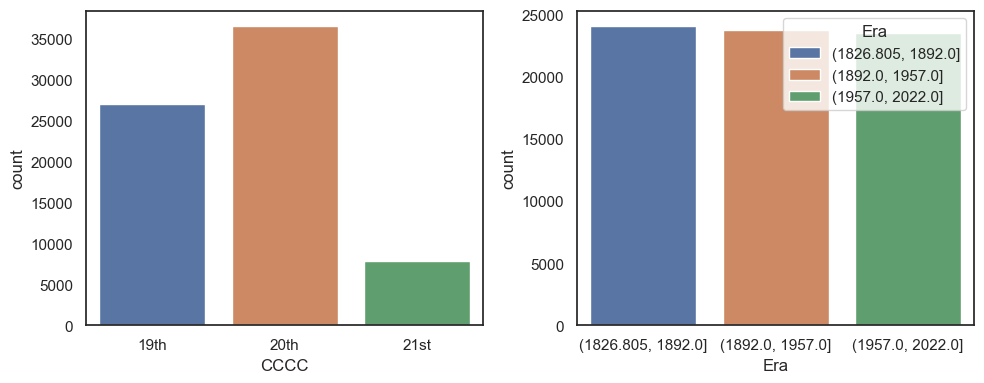

In [16]:
weather['Era'] = pd.cut(weather.YYYY, bins=3)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(data= weather, x = 'CCCC', hue = 'CCCC')

plt.subplot(1,2,2)
sns.countplot(data= weather, x = 'Era', hue = 'Era')

plt.tight_layout()
plt.show()

### Note on `pd.qcut()`

Above each of our bins are approximately the same size (~65 years). Because we have records from each year that means that each bin has approximately the same number of data points. However, this is not always the case. E.g., if the weather was not recorded for several years. With this in mind you could also use the related function `pd.qcut()` to split the data into quantiles. That means taht each bin will contain roughly the same number of observations. This might be useful is the data are skewed or unevenly distributed 